In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, cdist

In [2]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

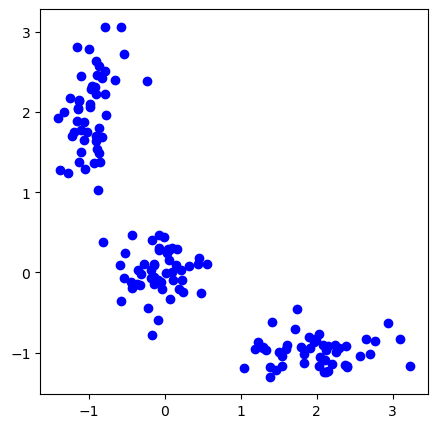

In [3]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], "bo")

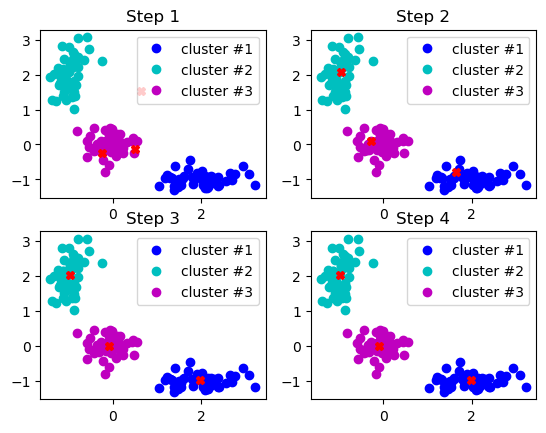

In [4]:
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    distances = cdist(X, centroids)
    
    labels = distances.argmin(axis=1)
    
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)
    
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="cluster #3")
    
    plt.plot(cent_history[i][:,0], cent_history[i][:, 1], "rX")
    plt.legend(loc=0)
    
    plt.title("Step {:}".format(i + 1))

In [5]:
inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, '$J(C_k)$')

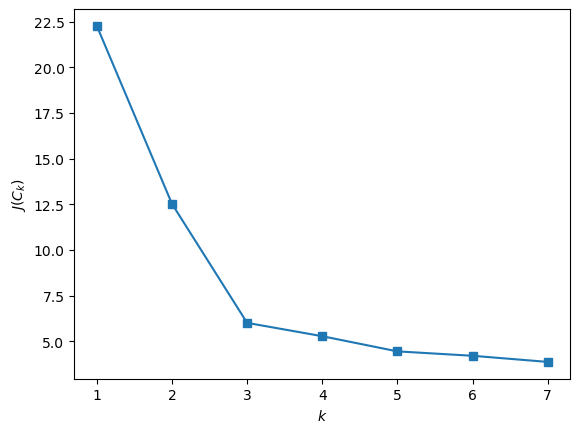

In [6]:
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$")

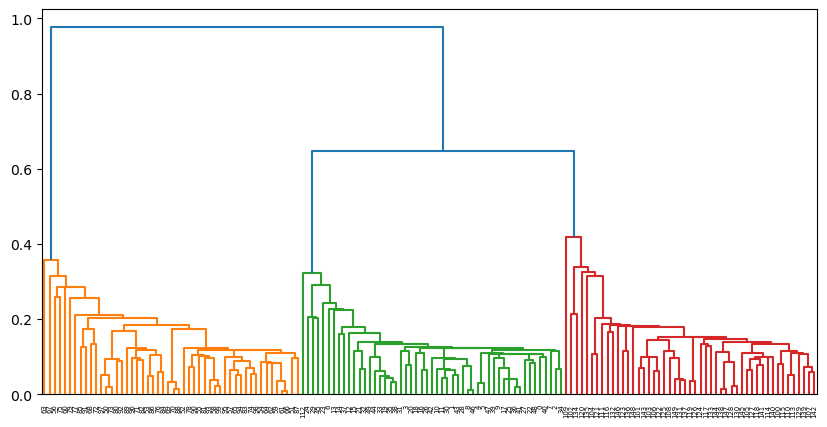

In [8]:
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [9]:
data = datasets.load_digits()
X, y = data.data, data.target

In [10]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure'], index=['K-means', 'Affinity', 'Spectral', 'Agglomerative','DBSCAN'])

results


,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.666618,0.741068,0.741543,0.745751,0.743641
Affinity,0.174985,0.612399,0.958901,0.486837,0.645800
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000


In [11]:
real_estate = pd.read_csv("real_estate_dataset_mk_missing.csv")
real_estate.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


In [12]:
num_cols = [
    "area_sq_meters",
    "num_rooms",
    "floor",
    "year_built",
    "distance_from_center_km",
    "price",
]

re_numeric = real_estate[num_cols].dropna()

print(re_numeric.shape)
re_numeric.head()

(748, 6)


,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,80.0,4.0,5.0,2009.0,3.55,150804.0
1,92.1,5.0,3.0,2008.0,3.54,178480.0
2,97.4,5.0,0.0,2002.0,2.41,168418.0
3,49.5,3.0,5.0,2024.0,3.97,90170.0
5,80.0,5.0,1.0,2000.0,1.97,130837.0


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(re_numeric)

X_scaled[:5]

array([[ 0.33509113,  0.27805751,  1.24904936,  0.35373124, -0.03458406,
         1.30021501],
       [ 0.87781379,  1.0483798 ,  0.15246612,  0.26623423, -0.04004393,
         1.94367002],
       [ 1.11553529,  1.0483798 , -1.49240875, -0.25874785, -0.65700957,
         1.70973288],
       [-1.03292881, -0.49226478,  1.24904936,  1.66618642,  0.1947306 ,
        -0.10949924],
       [ 0.33509113,  1.0483798 , -0.94411712, -0.43374187, -0.89724398,
         0.8359909 ]])

In [14]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PC1+PC2:",
      pca.explained_variance_ratio_.sum().round(3))

Explained variance by PC1+PC2: 0.597


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


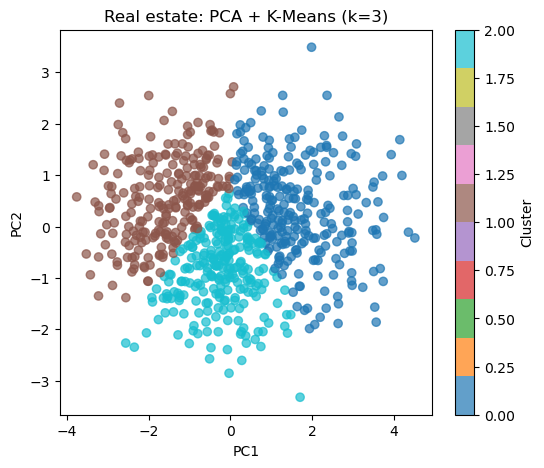

In [15]:
kmeans_re = KMeans(n_clusters=3, random_state=42, n_init="auto")
re_clusters = kmeans_re.fit_predict(X_pca)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=re_clusters,
    cmap="tab10",
    alpha=0.7
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Real estate: PCA + K-Means (k=3)")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [16]:
re_numeric_with_cluster = re_numeric.copy()
re_numeric_with_cluster["cluster"] = re_clusters

re_numeric_with_cluster.groupby("cluster").mean().round(1)

,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
cluster,,,,,,
0,94.4,4.9,3.0,2006.4,3.2,135044.0
1,51.4,2.4,3.6,2004.5,2.9,59654.5
2,69.5,3.5,1.6,2003.8,4.7,86040.2


In [17]:
loan = pd.read_csv("exam prep marija\loan_data_v3.csv")
loan.sample(10)

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
2652,14414,25.0,female,Bachelor,128013.0,2,MORTGAGE,25000.0,MEDICAL,11.36,0.20,3.0,686.0,Yes,NaN
1248,43953,23.0,male,Bachelor,22473.0,1,RENT,4000.0,MEDICAL,11.08,0.18,3.0,605.0,No,1.0
3594,20346,28.0,male,High School,49248.0,6,OWN,3600.0,EDUCATION,6.99,0.07,10.0,680.0,No,0.0
3314,2195,26.0,female,Bachelor,121263.0,5,RENT,NaN,PERSONAL,7.14,0.11,3.0,648.0,Yes,0.0
1517,17153,26.0,female,Bachelor,46140.0,4,RENT,2000.0,MEDICAL,14.96,0.04,2.0,536.0,No,1.0
2371,13770,23.0,female,Master,116305.0,0,MORTGAGE,12000.0,MEDICAL,7.49,0.10,4.0,579.0,Yes,0.0
6343,41646,30.0,female,Master,108750.0,6,MORTGAGE,12000.0,EDUCATION,7.43,0.11,8.0,679.0,Yes,0.0
5167,979,22.0,male,High School,58364.0,0,RENT,18000.0,EDUCATION,11.01,0.31,2.0,591.0,No,1.0
7691,4632,24.0,female,Master,51480.0,2,MORTGAGE,4900.0,EDUCATION,6.03,0.10,4.0,634.0,Yes,0.0
474,37329,31.0,female,Master,41943.0,11,RENT,1500.0,EDUCATION,10.88,0.04,6.0,673.0,Yes,0.0


In [18]:
loan = loan.drop(columns=["Unnamed: 0"])
loan = loan.dropna()

X_loan = loan.drop(columns=["loan_status"])
y_loan = loan["loan_status"]

numeric_features = X_loan.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_loan.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_features, categorical_features

(['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score'],
 ['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'previous_loan_defaults_on_file'])

In [19]:
preprocess_loan = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_loan_pre = preprocess_loan.fit_transform(X_loan)

if hasattr(X_loan_pre, "toarray"):
    X_loan_pre = X_loan_pre.toarray()
    
X_loan_pre.shape

(5945, 27)

In [20]:
pca_loan = PCA(n_components=2, random_state=42)
X_loan_pca = pca_loan.fit_transform(X_loan_pre)

print("Explained variance (2 PCs):",
      pca_loan.explained_variance_ratio_.sum().round(3))

Explained variance (2 PCs): 0.412
